<a href="https://colab.research.google.com/github/s-r-aman/machine_learning_playground/blob/master/fastdotai_dl/lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai

In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
n = 100

In [0]:
x = torch.ones(n, 2); x
x[:,0].uniform_(-1, 1);
x[:5]

tensor([[-0.4610,  1.0000],
        [ 0.5946,  1.0000],
        [ 0.8182,  1.0000],
        [ 0.4233,  1.0000],
        [-0.0728,  1.0000]])

In [0]:
a = tensor(3., 2); a 

tensor([3., 2.])

In [0]:
q = a@x
p = x@a; p

RuntimeError: ignored

In [0]:
y = x@a + torch.rand(n); y

tensor([ 0.7807,  3.8084,  4.8471,  3.4582,  2.7760,  2.6990,  5.0008,  5.2645,
         3.6917,  4.2613,  3.1315,  3.9436,  1.4569,  2.9529,  4.2322,  4.2685,
         4.4720,  2.3973,  0.5579,  4.8913,  0.0535,  3.7506,  2.6142,  1.8379,
         3.0101,  5.6947,  0.7996,  2.6388,  2.1623,  2.9912,  3.8977,  5.0893,
         0.4618,  1.6721,  5.2885,  0.5890,  1.2010,  0.2824, -0.2349,  3.2694,
         4.8565,  2.8296,  2.8276, -0.0412,  1.7056,  2.9124,  1.5220,  4.8314,
         2.4076,  0.2101,  5.4484,  3.6433,  4.1427,  4.0523,  4.6285, -0.1292,
         0.1593,  4.2472,  2.9917,  5.1577,  4.9964,  0.3021,  4.0193,  1.7534,
         1.5624,  1.5614,  5.2139,  1.2593,  1.8504,  2.8786,  4.0492,  2.4549,
         1.5411, -0.1993,  4.9486,  4.9818,  3.2963,  3.2912, -0.1936,  4.6272,
         2.6328,  0.1107,  4.3647,  2.6443,  4.2991,  1.7691,  5.2596,  4.6941,
         1.5075,  3.3715,  3.8651,  0.5667,  2.6063,  2.3506,  1.3855,  0.6641,
        -0.5334,  1.6997,  4.7673,  2.87

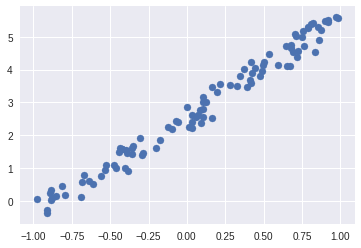

In [0]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

tensor([0.9514, 0.6852, 0.3912, 0.6947, 0.0195, 0.2060, 0.0465, 0.6125, 0.1986,
        0.1894, 0.9586, 0.1177, 0.5463, 0.2336, 0.7212, 0.4771, 0.9726, 0.3170,
        0.5724, 0.7579, 0.5714, 0.7657, 0.2367, 0.9468, 0.4895, 0.6720, 0.1717,
        0.5925, 0.8821, 0.6844, 0.1249, 0.0908, 0.5563, 0.0796, 0.2631, 0.1735,
        0.2102, 0.8812, 0.5429, 0.1947, 0.7354, 0.0365, 0.1025, 0.4645, 0.1572,
        0.6034, 0.5069, 0.8097, 0.3420, 0.5661, 0.1215, 0.4881, 0.8819, 0.5565,
        0.4316, 0.0621, 0.5763, 0.8303, 0.2280, 0.3477, 0.8347, 0.6707, 0.7376,
        0.8953, 0.9487, 0.4801, 0.1464, 0.6831, 0.3837, 0.5340, 0.9800, 0.8064,
        0.3157, 0.8993, 0.5530, 0.9692, 0.6732, 0.3822, 0.9041, 0.1615, 0.2665,
        0.6040, 0.7272, 0.7378, 0.0539, 0.6245, 0.7844, 0.3121, 0.0487, 0.2324,
        0.1691, 0.4931, 0.3804, 0.9692, 0.3802, 0.3776, 0.9596, 0.5808, 0.4859,
        0.9459])

In [0]:
a = tensor(-1.,1)

In [0]:
y_hat = x@a
mse(y_hat, y)

tensor(8.6095)

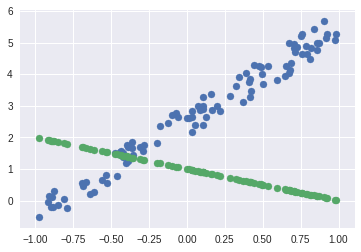

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [0]:
lr = 1e-1

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if loss % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

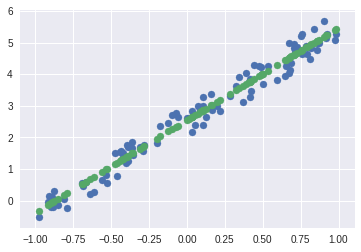

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)